<a href="https://colab.research.google.com/github/JoaoMartins33/PDS_LAB_1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSP Lab 2022-23


This lab assignment requires preparation before the lab session. Try to fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" before the session in order to use the limited amount of available time to clarify any doubt or to discuss your solution. Paragraphs that start with ❓explain what you will need to do in the following cell.

Before you turn this notebook in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).


---

## Lab1 - Analysis of (Quasi-)Stationary Audio Signals

_Luis Caldas de Oliveira_

Audio analysis is the process of extracting and interpreting meaningful information from audio signals such as music or speech. It can be used to extract specific features from audio signals.

This lab assignment will introduce some tools and concepts for the representation and analysis of (mostly) stationary audio signals.

This document was inspired by the "Sampling and Aliasing" lab assignment by João Sanches and revised by Rita Cunha, Margarida Silveira, Jorge Marques, Luís B. Almeida, and Pedro Aguiar.


### Group and Student ID

#### A01 - Initialize group and student id

❓Initialize the variable `group_id` with the number that Fenix assigned to your group and `ist_id1` and `ist_id2` with your student numbers.

In [3]:
# YOUR CODE HERE
group_id = 16
ist_id1 = 91592
ist_id2 = 97381
print(f"Group number: {group_id}")
print(f"Student number: {ist_id1}")
print(f"Student number: {ist_id2}")

Group number: 16
Student number: 91592
Student number: 97381


In [4]:
assert isinstance(group_id, int) and isinstance(ist_id1, int) and isinstance(ist_id2, int) 
assert (group_id > 0) and (group_id < 35)
assert (ist_id1 > 60000) and (ist_id1 < 120000) and (ist_id2 > 60000) and (ist_id2 < 120000)

### Import NumPy package

NumPy is a Python library that provides functions to process multidimensional array objects. The NumPy documentation is available [here](https://numpy.org/doc/1.24/).


In [5]:
import numpy as np


## Music signal

A musical signal is a type of audio signal composed of a range of frequencies and stable amplitudes in specific time periods. It is typically generated using musical instruments or through digital means such as synthesizers, samplers, and digital audio workstations.

A musical note is a sound frequency or pitch that is used to represent a musical tone. Musical notes are typically represented by the letters A through G, which correspond to different pitches on the musical scale.

An **octave** is an interval between two musical notes where the higher note is twice the fundamental frequency of the lower note. For example, C4 and C5 represent an octave and can be represented in a musical score as:

![Perfect octave](https://upload.wikimedia.org/wikipedia/commons/a/a5/Perfect_octave_on_C.png)

An **equal temperament** is a tuning system that divides an octave into equal steps.

In Western music, the most common tuning system is the 12-tone equal temperament (12-TET) also called the **chromatic scale** where the frequencies of the **semitones** are equally separated in a logarithmic scale, that is, are separated by $2^\frac{1}{12} \approx 1.059462$.

The semitones chromatic scale can be represented by the letters:

C, C#, D, D#, E, F, F#, G, G#, A, A#, B

If $f_{C4}$ is the frequency of the C4 note, the frequency of C\#4 is $f_{C\#4} = 2^\frac{1}{12} f_{C4}$ 

The semitones have equivalents in solfege's rising scale:

Do, Di, Re, Ri, Mi, Fa, Fi, Sol, Si, La, Li, Ti

![Chromatic scale](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Chromatische_toonladder.png/600px-Chromatische_toonladder.png)


### Your group's note

Each group in the class will have its musical note. To know your group's note, run the next code cell.

In [6]:
semitones = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
group_note = semitones[(ist_id1+ist_id2)%12] + str(3+(group_id-3)%4)
print(f"Your group's note is: {group_note}")

Your group's note is: A4


### Your group's frequency

#### A02 - Calculate the group's frequency

❓Using the provided information about the music signal, and knowing that A4 has a frequency of 440 Hz, initialize the variable `group_frequency` with the frequency of your group's note.

In [7]:
# YOUR CODE HERE
# TODO: Review
group_frequency = 440
print(f"Your group frequency is: {group_frequency:.2f}")

Your group frequency is: 440.00


In [8]:
assert (group_frequency > 130) and (group_frequency < 4000)

### Sine wave

A sine wave, or sinusoid, is a mathematical curve defined in terms of the $\sin$ function. A continuous-time sine wave can be defined as:
$$
x(t)=A\sin(\Omega t+\phi)
$$

where:
- $A$ is the amplitude of the sine wave
- $\Omega$ is the continuous-time angular frequency in radians per second
- $\phi$ is the phase in radians

The angular frequency is related with the ordinary frequency $f$ (in Hertz) by:
$$
\Omega=2\pi f
$$


The continuous-time sine wave is periodic with period $T=\frac{1}{f}=\frac{2\pi}{\Omega}$.

The discrete-time sine wave can be define as:
$$
x(n) = A \sin\left(\omega n+\phi \right)
$$

where $\omega$ is the discrete-time angular frequency in radians per second.

The discrete-time sine wave is periodic if $\omega = \frac{2\pi}{N}$, where $N \in \mathbb{N}$ is the fundamental period of the sine wave.

In the following code block the function `sinewave()` implements a discrete-time sine wave. The function is used to generate a pure tone of 1kHz with the duration of one second at the sampling frequency of 22050 Hz.

In [9]:
def sinewave(n, w, A=1, phi=0):
	return A * np.sin(w*n + phi)

# Test: generate a 1000 Hz sine wave
fs = 22050
w = 2*np.pi*1000/fs
n = np.arange(0, fs)
sine1k = sinewave(n, w)

from IPython.display import Audio
display(Audio(sine1k, rate=fs))

### Square wave

A square wave is a mathematical function that alternates between two symmetrical values at a steady frequency. A continuous-time square wave is commonly defined as:
$$
x(t) = A\ \text{sign}(\sin(\Omega t+\phi))
$$

However, this definition can result in 3 possible values for $x(t)$ ($A, -A, 0$) since $\text{sign}(0)=0$.

A better definition is
$$
x(t) = A (-1)^{\lfloor \frac{\Omega t+ \phi}{\pi} \rfloor}
$$

where $\lfloor x \rfloor$ is the floor function and the remaining parameters are the same as the sine wave:
- $A$ is the amplitude of the square wave
- $\Omega$ is the continuous-time angular frequency in radians per second
- $\phi$ is the phase in radians

The discrete-time square wave can be define as:
$$
x(n) = A (-1)^{\lfloor \frac{\omega n + \phi}{\pi} \rfloor}
$$

where $\omega$ is the discrete-time angular frequency in radians per second.

The discrete-time sine wave is periodic if $\omega = \frac{2\pi}{N}$, where $N \in \mathbb{N}$ is the fundamental period.

The following function `squarewave()` implements a discrete-time square wave:

In [10]:
def squarewave(n, w, A=1, phi=0):
	return A*(-1)**np.floor((w*n+phi)/np.pi)

# Test: generate a 1 square square wave at 1000 Hz
w=2*np.pi*1000/fs
n=np.arange(0, fs)
square1k=squarewave(n, w)

from IPython.display import Audio
Audio(square1k, rate=fs)

### Sound perception

#### A03 - Compare sound differences

❓Describe the audible similarities and differences between the two sounds and try to explain them based on the characteristics of the waveforms (100 words max)

YOUR ANSWER HERE

### Root Mean Square (RMS)

For audio signals, the RMS measures the average loudness of the signal.

The root mean square (RMS) of a sequence of $N$ values is the square root of the arithmetic mean of the squares of the values, that is
$$
x_{RMS}=\sqrt{ \frac{1}{N} \sum_{n=0}^{N-1}\left[x(n)\right]^{2}}
$$

#### A04 - Function to compute RMS

❓Write a function that computes the RMS of a sequence of numbers

In [11]:

def rms(x):
    """ computes the root mean square of the values in x
    """
    return np.sqrt((1/x.size)*np.sum(x**2))

In [12]:
assert np.isclose(rms(np.ones(64)),1)

### Time domain visualization

The python package LibROSA provides several functions to analyze and process audio signals. The `librosa.display.waveshow()` function can be used to display long signals in a compact format. Depending on the size of the signal to be displayed it adaptively switches between a raw samples-based view and an amplitude-envelope view.

In the next code block we will fetch an example audio signal from the LibROSA repository and show how it changes with time. You can also use `librosa.load()` to read sound files in several formats (wav, mp3, etc.).

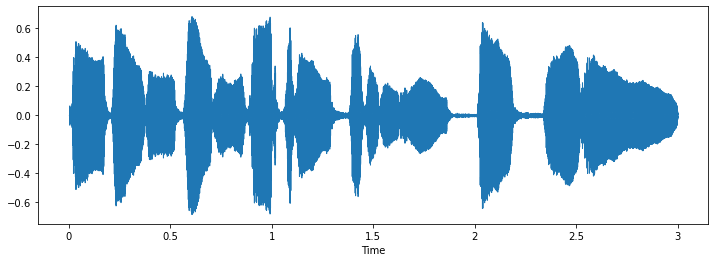

In [13]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

trumpet_long, trumpet_fs = librosa.load(librosa.ex('trumpet'))

# take the first 3 seconds
trumpet = trumpet_long[0:3*trumpet_fs]

fig, ax = plt.subplots(figsize=(12,4))
librosa.display.waveshow(trumpet, sr=trumpet_fs)

display(Audio(trumpet, rate=trumpet_fs))



### Visualise a segment of the signal

This audio signal is an example of a non-stationary signal. It contains a sequence of musical notes with different durations. To analyze the recording with more detail we can use an helper function to plot smaller segments of the signal. For example, the second note of the recording starts at around 210 ms and lasts for around 160 ms.

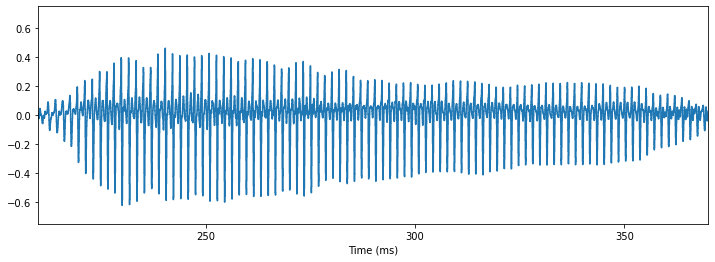

In [14]:


def waveshow_seg(x, fs, tmin=0, tmax=0):
    if (tmin < 0) or (tmin > x.size/fs):
        tmin = 0
    if (tmax <= 0) or (tmax > x.size/fs): 
        tmax = x.size/fs
    fig, ax = plt.subplots(figsize=(12,4))
    ax.set(xlim=[tmin, tmax])
    librosa.display.waveshow(x, sr=fs, x_axis='ms')
    return

start = 0.21
end = 0.37
waveshow_seg(trumpet, trumpet_fs, tmin=start, tmax=end)

# select the segment for playing
n_seg = np.arange(np.floor(start*trumpet_fs), np.ceil(end*trumpet_fs), dtype=int)
Audio(trumpet[n_seg], rate=trumpet_fs)

### Fundamental frequency

The second note of the signal is not stationary: there is an on-set, a more or less stable region and a final decay. It is also noticible that the time interval between the peaks of the wave seem to be constant.

#### A05 - Estimate the fundamental frequency

❓Consider that the middle of the quasi-stationary region of the second note occurs at t=294 ms. Plot at least 8 full periods of the signal after that time instant and estimate the fundamental frequency of the note, that is, the inverse of the distance between peaks.

Second note frequency: 459.38 Hz


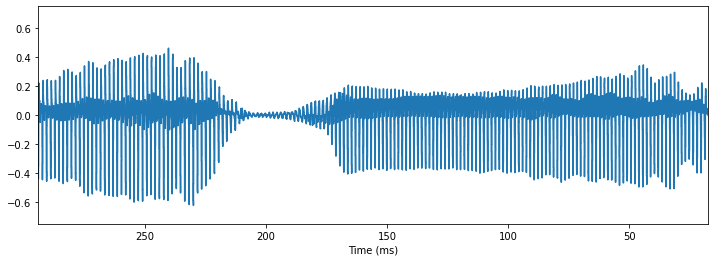

In [15]:
middle_stable_region = 0.294
p1=np.argmax(trumpet)

cp=np.delete(trumpet,p1)
aux=np.argmax(cp)
p2=aux if aux<p1 else aux+1
note_frequency=1/(abs((p1-p2)/trumpet_fs))

period=1/note_frequency
waveshow_seg(trumpet, trumpet_fs, tmin=middle_stable_region, tmax=8*period)

print(f"Second note frequency: {note_frequency:.2f} Hz")

In [16]:
assert (note_frequency > 130) and (note_frequency < 4000)

### Visualize your pure tone

#### A06 - Generate your pure tone

❓Use the function `sinewave()` to generate a sinusoidal signal (pure tone) with the duration of 2 seconds ($F_s = 22050 Hz$) and store it in a variable named `group_tone` and copy the first 3 periods to a variable named `group_tone_3p`.

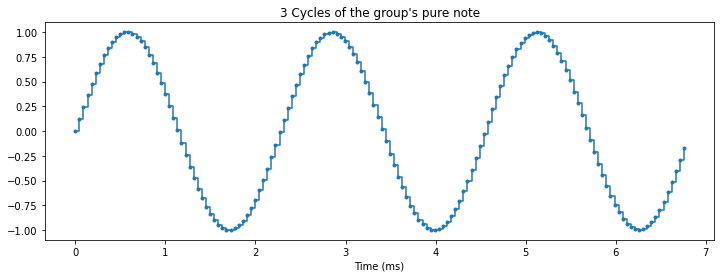

In [17]:


fs = 22050

w = 2*np.pi*group_frequency/fs
n = np.arange(0, 2*fs)
group_tone    = sinewave(n, w)

n3p = int((3/group_frequency) / (1/fs))
group_tone_3p = group_tone[0:n3p]

fig, ax = plt.subplots(figsize=(12,4))
ax.set(title='3 Cycles of the group\'s pure note')
librosa.display.waveshow(group_tone_3p, sr=fs, marker='.', x_axis='ms')


Audio(group_tone, rate=fs)

In [18]:
assert np.isclose(len(group_tone), 2*fs)

### Frequency domain visualization

The spectrum of a signal is composed by the range of frequencies presented in the signal. The discrete-time Fourier transform (DTFT) can be used to compute the frequency representation of a signal. However, the DTFT is a function of a real variable $\omega \in \mathbb{R}$ that needs to be sampled for use in a digital computer.

The sampled representation of the DTFT is called discrete Fourier transform (DFT) that allows a very efficient implementation using the fast Fourier transform (FFT):
$$
X(k) = \sum_{n=0}^{N-1} x(n) e^{-j \frac{2\pi}{N} kn},\; 0 \leq k \leq N-1
$$

Given the periodicity of the complex exponential $e^{-j \frac{2\pi}{N} kn}$, the definition of $X(k)$ results in a periodic sequence of period $N$. This is prevented by limiting the range of $k$.

The `mag_spectrum()` function plots $|X(k)|$, the magnitude of the spectrum of the sequence $x(n)$.

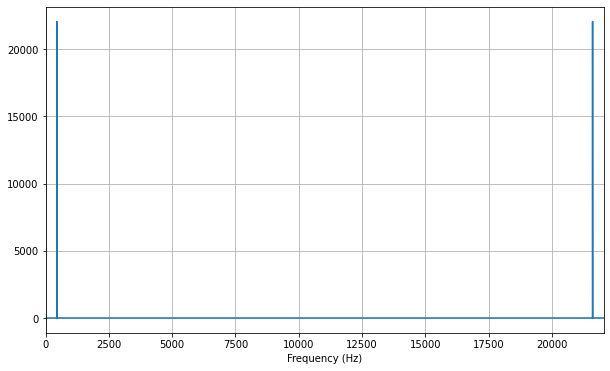

In [19]:


from scipy.fft import fft
import math
from matplotlib import pyplot as plt

import numpy as np
from numpy.fft import fft

from matplotlib import pyplot as plt

def mag_spectrum(x, fs, fmin=0, fmax=0):
    """
    Plot the magnitude spectrum of sequence x
    using the sampling frequency fs
    """

    X = fft(x)
    X_mag = np.absolute(X)
    
    # the DFT samples the frequency range with N points
    f = np.linspace(0,fs, X.size)
    
    # plot frequency range
    if (fmin < 0 or fmin>fs):
        fmin = 0
    if (fmax <= 0 or fmax>fs):
        fmax = fs/2
    
    # plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlim=(fmin, fmax))
    ax.plot(f, X_mag)
    plt.xlabel('Frequency (Hz)')
    plt.grid()

# Test: plot the magnitude spectrum of the group's tone
mag_spectrum(group_tone, fs, fmin=0, fmax=fs)



### Symmetry Property of the DFT

As shown in the previous plot, if $x(n)$ is a sequence of real values, the coefficients of it's DFT have the property that $|X(k)| = |X(N-k)|$. For this reason, we can limit the range of the spectrum to half of the sampling frequency without loss of information.

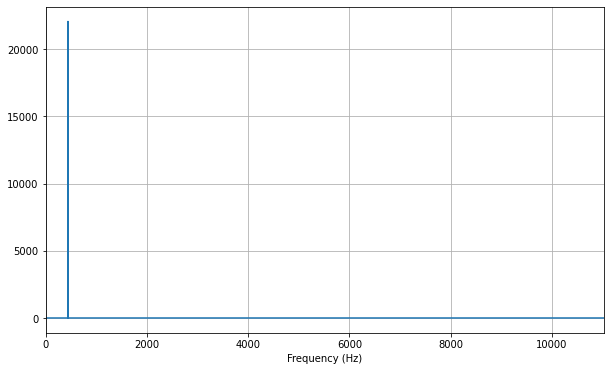

In [20]:
mag_spectrum(group_tone, fs, fmin=0, fmax=fs/2)

To confirm that the frequency of the peak corresponds to the group's frequency, we can limit the plot to the vicinity of that frequency

The group's frequency is 440.00 Hz


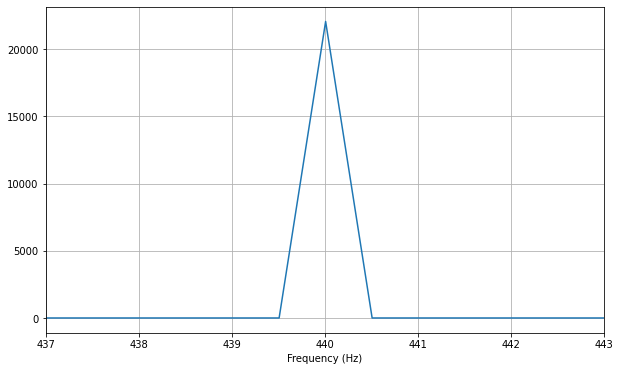

In [21]:
mag_spectrum(group_tone, fs, fmin=group_frequency-3, fmax=group_frequency+3)
print(f"The group's frequency is {group_frequency:.2f} Hz")

### Square wave harmonics

Any periodic signal can be decomposed into a sum of sinusoids with frequencies that are a multiples of the fundamental frequency. Those frequencies are called harmonics.

#### A07 - Generate your square wave

❓Create a sequence name `sqw` with 2048 samples a square wave with your group's frequency (at 22050 samples/s), plot it's magnitude spectrum and assign the frequency of the first 2 peaks to the variables named `peak1freq` and `peak2freq`

The first peak frequency is 441.431 Hz
The second peak frequency is 1324.292 Hz


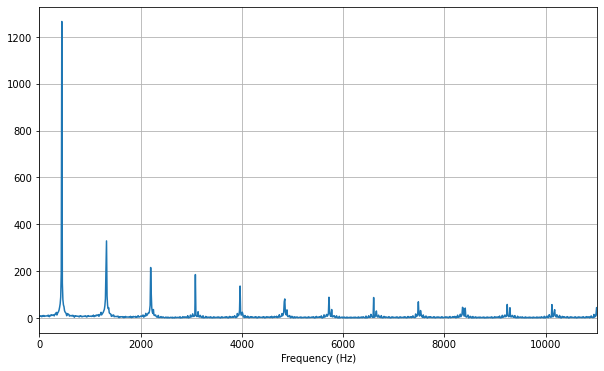

In [23]:
from scipy.signal import find_peaks

fs = 22050

w=2*np.pi*group_frequency/fs
n=np.arange(0, 2048)
sqw=squarewave(n, w)
mag_spectrum(sqw, fs)

df = fs/n.size
x     = fft(sqw)
X_mag = np.absolute(x)
 
peaks, _ = find_peaks(X_mag, height=200)
peak1freq = peaks[0]*df
peak2freq = peaks[1]*df

print(f"The first peak frequency is {peak1freq:.3f} Hz")
print(f"The second peak frequency is {peak2freq:.3f} Hz")

In [24]:
assert len(sqw)==2048
assert np.isclose(peak1freq, group_frequency)


AssertionError: ignored

### Trumpet note harmonics

#### A08 - Locate the harmonics

❓Create a sequence name `note` with 1024 samples around the middle of stable region of the second note of the trumpet recording, plot it's magnitude spectrum and assign the frequency of the first 5 peaks to an array named `note_freq_peaks`.


Peak 1 frequency is 581.396484375 Hz
Peak 2 frequency is 1162.79296875 Hz
Peak 3 frequency is 1765.72265625 Hz
Peak 4 frequency is 2347.119140625 Hz
Peak 5 frequency is 2928.515625 Hz


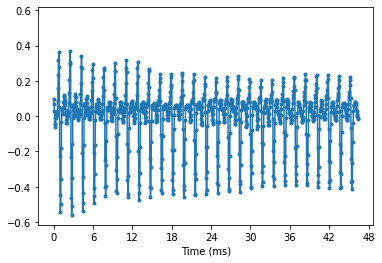

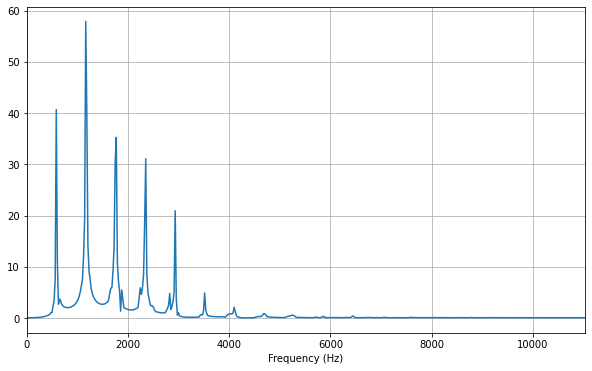

In [29]:
N = 1024
tmiddle = middle_stable_region
nstart  = int(tmiddle*trumpet_fs) - (N/2)
nend    = nstart + N
note    = trumpet[int(nstart):int(nend)] 

librosa.display.waveshow(note, sr=fs, marker='.', x_axis='ms')
mag_spectrum(note, trumpet_fs)

x     = fft(note)
X_mag = np.absolute(x)

note_freq_peaks, _ = find_peaks(X_mag, height=10)
note_freq_peaks = note_freq_peaks * (fs/N)

print(f"Peak 1 frequency is {note_freq_peaks[0]} Hz")
print(f"Peak 2 frequency is {note_freq_peaks[1]} Hz")
print(f"Peak 3 frequency is {note_freq_peaks[2]} Hz")
print(f"Peak 4 frequency is {note_freq_peaks[3]} Hz")
print(f"Peak 5 frequency is {note_freq_peaks[4]} Hz")

In [30]:
assert len(note)==1024
assert np.isclose(note_freq_peaks[0], note_frequency, atol=10)

AssertionError: ignored

### Resampling

Resampling, or sample-rate conversion, is the process of obtaining a new discrete representation of the underlying continuous signal with a different sampling interval.

There are two basic operations in sample-rate conversion:

1. Decimation: the reduction of the sample-rate by an integer factor of $M$
$$
x_{d}(n) = x(Mn)
$$

2. Interpolation: the increase of the sample-rate by an integer factor of $L$
$$
x_e(n) = 
    \begin{cases}
    x(n/L) & n=0, \pm L, \pm 2 L, \ldots\\
    0 & \text{otherwise}
    \end{cases}
$$
The decimated signal $x_d(n)$ has fewer samples than the original signal $x(n)$, while the interpolated signal $x_{e}(n)$ as more samples than the original.

The next code cell decimates the audio signal by a factor of $M=6$.


In [ ]:
M = 6
trumpet_dec = trumpet[::int(M)]
display(Audio(trumpet, rate=trumpet_fs))
display(Audio(trumpet_dec, rate=trumpet_fs/M))
print(f"The new sample rate is {trumpet_fs/M} Hz")

### Aliasing

In the previous example you could ear that the decimation distorted the signal. This type of distortion is called _aliasing_.

To understand what happened, we can look at the magnitude spectrum of the stationary region of the second note, stored in the `note` array, when plotted in a full frequency scale.

In [ ]:
M=6
note_dec = note[::int(M)]
display(Audio(note, rate=fs))
display(Audio(note_dec, rate=fs/M))
plt.show()
mag_spectrum(note, fs, fmax=trumpet_fs)
plt.show()
mag_spectrum(note_dec, fs/M, fmax=trumpet_fs/M)

#### A09 compare decimated with original note

❓Locate the frequencies of the peaks of the decimated note and compare with the frequencies of the first 5 harmonics of the original signal. Explain what happened. (150 words max)

YOUR ANSWER HERE

### FIR low-pass filter

A finite impulse response (FIR) filter is a type of filter whose impulse response is of finite duration, that is, it becomes zero after a certain amount of time. It is described by the following difference equation:
$$
y(n) = \sum_{k=0}^{N-1} b_{k} x(n-k)
$$
where $x(n)$ is the filter input signal, $y(n)$ is its output, and $N$ is the order of the filter.

Contrary to an infinite impulse response (IIR) filter, an output sample of an FIR filter does not depend on the values of other output samples.

The process of FIR filter design is based on the impulse response of an ideal filter with the desired characteristics, truncated by a finite-length window.

The next code cell uses a low-pass filter of order 100 and a cut-off frequency of $\omega_c = \pi/M$ rad/sample. This cut-off frequency corresponds to $f_c=F_s/(2M)$ Hz, where $F_s$ is the sampling frequency.

In [ ]:
import scipy.signal as sig

M=6

b = sig.firwin(100, 1/M)
trumpet_filt = sig.lfilter(b, 1, trumpet)
trumpet_filt_dec = trumpet_filt[::M]

display(Audio(trumpet, rate=fs))
display(Audio(trumpet_dec, rate=fs/M))
display(Audio(trumpet_filt_dec, rate=fs/M))


note_filt = sig.lfilter(b, 1, note)
note_filt_dec = note_filt[::M]

mag_spectrum(note, trumpet_fs, fmax=trumpet_fs)
plt.show()
mag_spectrum(note_filt, trumpet_fs, fmax=trumpet_fs)
plt.show()
mag_spectrum(note_filt_dec, trumpet_fs/M, fmax=trumpet_fs/M)


#### A10 Effect of the low-pass filter

❓Compare the sound of the three versions of the recording and explain the effect of the filter. What is the reason for choosing a cut-off frequency of $f_c=F_s/(2M)$ Hz? (150 words max)

YOUR ANSWER HERE